Amazon Sales Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'C:\Users\udit2\Documents\GitHub\Assignment\Resources\amazon.csv')

In [3]:
#Convert ₹ and % into numric values
def clean_price_column(column):
    return df[column].replace('[₹,%]','',regex=True).replace(',','',regex=True).astype(float)

In [4]:
df['discounted_price'] = clean_price_column('discounted_price')
df['actual_price'] = clean_price_column('actual_price')
df['discount_percentage'] = clean_price_column('discount_percentage')
df['rating'] = pd.to_numeric(df['rating'],errors='coerce')
df['rating_count'] = df['rating_count'].replace(',','',regex=True).astype(float)

df['main_category'] = df['category'].str.split('|').str[0]

1.  What is the average rating for each product category?

In [5]:
avg_rating_by_category = df.groupby('main_category')['rating'].mean().sort_values(ascending=False)
print(avg_rating_by_category)

main_category
OfficeProducts           4.309677
Toys&Games               4.300000
HomeImprovement          4.250000
Computers&Accessories    4.154967
Electronics              4.081749
Home&Kitchen             4.040716
Health&PersonalCare      4.000000
MusicalInstruments       3.900000
Car&Motorbike            3.800000
Name: rating, dtype: float64


C:\Users\udit2\AppData\Local\Temp\ipykernel_18952\2590615957.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_category.values,y=avg_rating_by_category.index,palette='viridis')


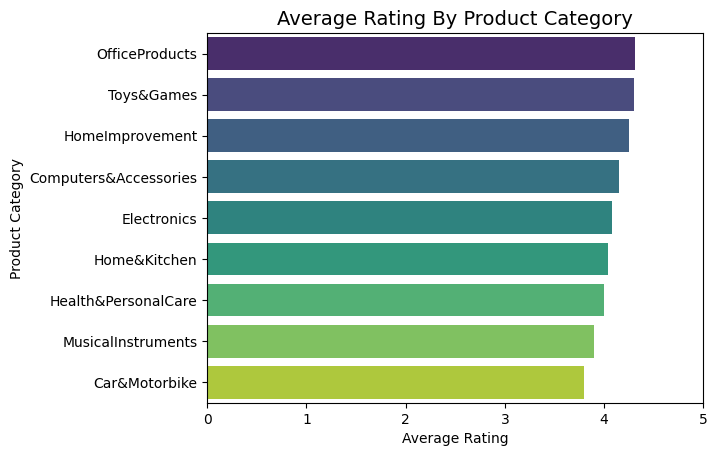

In [6]:
sns.barplot(x=avg_rating_by_category.values,y=avg_rating_by_category.index,palette='viridis')
plt.title("Average Rating By Product Category",fontsize=14)
plt.xlabel("Average Rating")
plt.ylabel("Product Category")
plt.xlim(0,5)
plt.show()

2.  What are the top rating_count products by category?

In [7]:
top_rating_count_by_category =df.loc[df.groupby('main_category')['rating_count'].idxmax()][['main_category','product_name','rating_count']]
top_rating_count_by_category

,main_category,product_name,rating_count
1157,Car&Motorbike,Reffair AX30 [MAX] Portable Air Purifier for C...,1118.0
588,Computers&Accessories,SanDisk Cruzer Blade 32GB USB Flash Drive,253105.0
12,Electronics,AmazonBasics Flexible Premium HDMI Cable (Blac...,426973.0
1247,Health&PersonalCare,Dr Trust Electronic Kitchen Digital Scale Weig...,3663.0
1028,Home&Kitchen,Pigeon Polypropylene Mini Handy and Compact Ch...,270563.0
982,HomeImprovement,"Gizga Essentials Cable Organiser, Cord Managem...",5985.0
613,MusicalInstruments,Boya ByM1 Auxiliary Omnidirectional Lavalier C...,68664.0
659,OfficeProducts,Casio FX-82MS 2nd Gen Non-Programmable Scienti...,12179.0
924,Toys&Games,Faber-Castell Connector Pen Set - Pack of 25 (...,15867.0


3. What is the distribution of discounted prices vs. actual prices?

<Axes: ylabel='Count'>

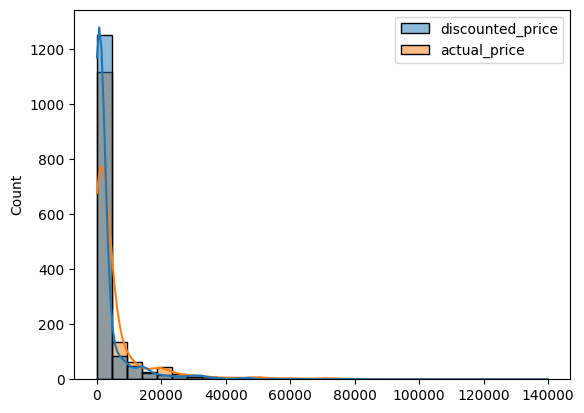

In [8]:
sns.histplot(df[['discounted_price','actual_price']],bins=30,kde=True)

4.How does the average discount percentage vary across categories?

In [9]:
avg_dicount_by_category = df.groupby('main_category')['discount_percentage'].mean().sort_values(ascending=False)
avg_dicount_by_category

main_category
HomeImprovement          57.500000
Computers&Accessories    54.024283
Health&PersonalCare      53.000000
Electronics              50.828897
MusicalInstruments       46.000000
Car&Motorbike            42.000000
Home&Kitchen             40.120536
OfficeProducts           12.354839
Toys&Games                0.000000
Name: discount_percentage, dtype: float64

5. What are the most popular product names?

In [10]:
popular_products = df.groupby('product_name')['rating_count'].sum().sort_values(ascending=False).head(5).reset_index()
popular_products

,product_name,rating_count
0,AmazonBasics Flexible Premium HDMI Cable (Blac...,853945.0
1,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...",426973.0
2,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...",426973.0
3,"JBL C100SI Wired In Ear Headphones with Mic, J...",385177.0
4,boAt Bassheads 100 in Ear Wired Earphones with...,363713.0


 6. What are the most popular product keywords?

In [11]:
import collections
all_keyword = df['about_product'].dropna().str.cat(sep=' ').lower().split()
custom_stopwords = set(['and', 'the', 'to', 'with', 'for', 'of', 'a', 'your', 'is', 'in', 'on', 
    'it', 'this', 'that', '|', '-', '&', 'from', 'by', 'an', 'as', 'at', 'be','you','or','can','not'])
filtered_keywords = [word for word in all_keyword if word.isalpha() and word not in custom_stopwords]
common_keyword = collections.Counter(filtered_keywords).most_common(10)
common_keyword

[('usb', 969),
 ('cable', 706),
 ('up', 599),
 ('charging', 548),
 ('power', 438),
 ('warranty', 434),
 ('all', 432),
 ('easy', 418),
 ('any', 387),
 ('which', 374)]

 7. What are the most popular product reviews?

In [12]:
popular_reviews = df['review_content'].value_counts().head(5).reset_index()
print(popular_reviews)

                                      review_content  count
0  I am not big on camera usage, personally. I wa...      8
1  Worked on iPhone 7 and didn’t work on iPhone X...      7
2  I ordered this cable to connect my phone to An...      7
3  Good product,long wire,Charges good,Nice,I bou...      7
4  128GB SD Card is showing 134GBDon't buy this p...      6


 8. What is the correlation between discounted_price and rating?

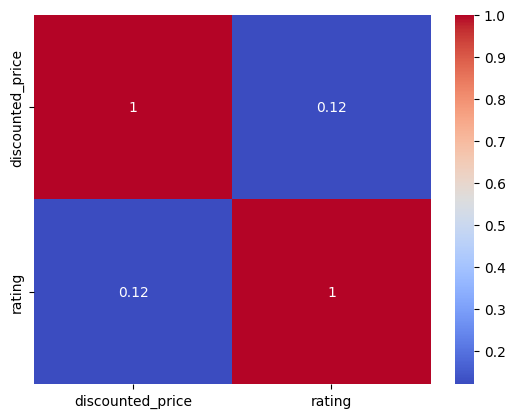

In [13]:
correlation = df[['discounted_price','rating']].corr()
sns.heatmap(correlation,annot=True ,cmap='coolwarm')
plt.show()

In [14]:
correlation.iloc[0,1]

0.12033741712288648

9. What are the Top 5 categories based on the highest ratings?

In [15]:
top_5_rated_category = df.groupby('main_category')['rating'].mean().sort_values(ascending=False)
top_5_rated_category.head(5).reset_index()

,main_category,rating
0,OfficeProducts,4.309677
1,Toys&Games,4.300000
2,HomeImprovement,4.250000
3,Computers&Accessories,4.154967
4,Electronics,4.081749


10. Identify any potential areas for improvement or optimization based on the data analysis.

In [16]:
low_rated_high_review = df[(df['rating'] <= 3.4) & (df['rating_count'] > 5000)]
low_rated_high_review['product_name'].reset_index()

,index,product_name
0,45,Wecool Nylon Braided Multifunction Fast Chargi...
1,744,"Zebronics ZEB-90HB USB Hub, 4 Ports, Pocket Si..."
2,857,Wecool Nylon Braided Multifunction Fast Chargi...
3,870,LS LAPSTER Quality Assured Universal Silicone ...
4,921,Canon PIXMA MG2577s All-in-One Inkjet Colour P...
5,1036,PRO365 Indo Mocktails/Coffee Foamer/Cappuccino...


These are the six products which needs improvement so that they acn get higher rating in future

Spotify Data:Popular Hip-Hop Artists and Tracks

 1.Load the dataframe and ensure data quality by checking for missing values and duplicate rows.
 Handle missing values and remove duplicate rows if necessary.

In [19]:
df = pd.read_csv(r'C:\Users\udit2\Documents\GitHub\Assignment\Resources\spotify.csv')
df.head(1)

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6


In [18]:
print("Missing values per column:\n" , df.isnull().sum())

Missing values per column:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64


In [20]:
print("Duplicated rows:" , df.duplicated().sum())

Duplicated rows: 27


In [21]:
df = df.dropna()

In [22]:
df = df.drop_duplicates()

 2.What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

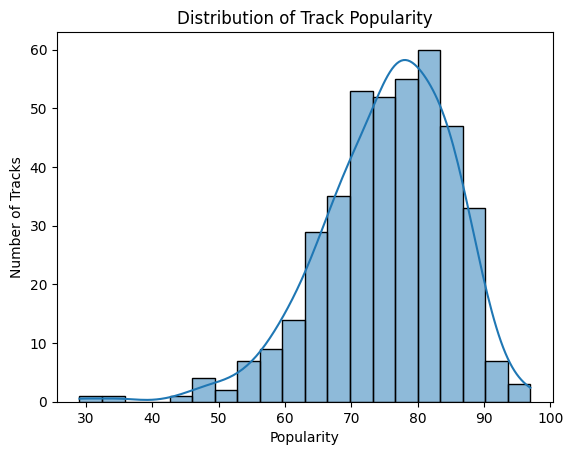

In [23]:
sns.histplot(df['Popularity'],bins=20,kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Number of Tracks')
plt.show()

 3.Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

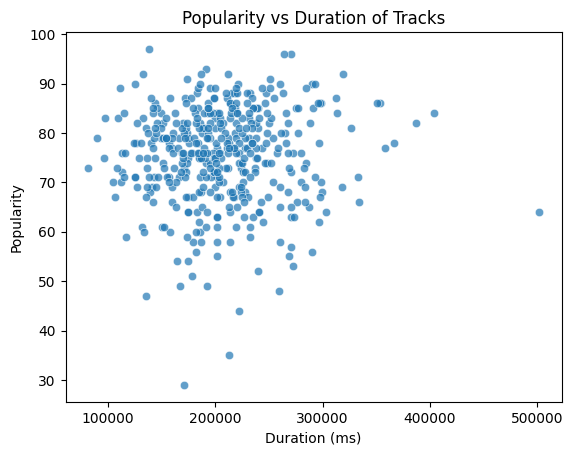

In [26]:
sns.scatterplot(data=df , x='Duration (ms)', y='Popularity' , alpha = 0.7)
plt.title('Popularity vs Duration of Tracks')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()

Most data points are clustered in the 150,000 to 250,000 ms range (which is 2.5 to 4 minutes — typical song length).

Popularity is mostly between 70 and 90, with a few outliers.

There’s no clear linear trend — popularity doesn’t strongly increase or decrease with duration.

A wide range of popularities exist at all durations (from ~120,000 ms to 300,000 ms), meaning duration alone doesn’t predict popularity well.

 4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist
 using a countplot.

In [33]:
top_artists = df['Artist'].value_counts().head(10).reset_index()
top_artists

,Artist,count
0,Drake,17
1,Eminem,11
2,Flo Rida,10
3,Ludacris,10
4,Timbaland,10
5,¥$,10
6,21 Savage,10
7,JAY-Z,10
8,Lil Nas X,10
9,Travis Scott,9


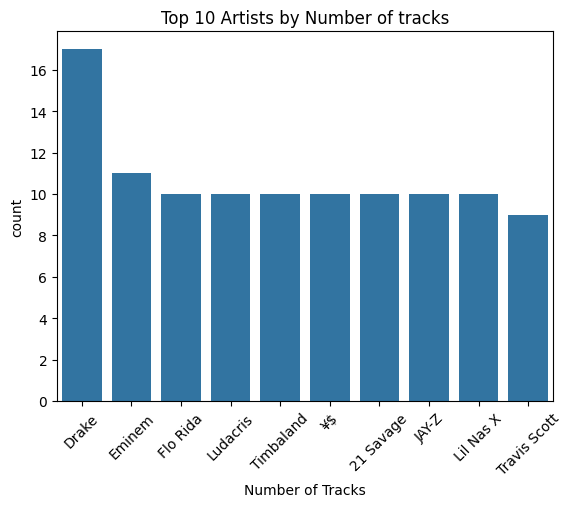

In [49]:
top_artists = df['Artist'].value_counts().head(10).index
sns.countplot(data=df[df['Artist'].isin(top_artists)], x='Artist', order=top_artists)
plt.title('Top 10 Artists by Number of tracks')
plt.xlabel('Artist Name')
plt.xlabel('Number of Tracks')
plt.xticks(rotation=45)
plt.show()


5.What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

In [50]:
df.head(1)

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6


In [72]:
least_popular = df.sort_values(by='Popularity',ascending=True).head(5)
least_popular[['Artist','Track Name','Popularity']].reset_index(drop=True)

,Artist,Track Name,Popularity
0,Pressa,Attachments (feat. Coi Leray),29
1,Justin Bieber,Intentions,35
2,French Montana,Splash Brothers,44
3,Lil Baby,On Me - Remix,47
4,Wyclef Jean,911 (feat. Mary J. Blige),48


6.Among the top 5 most popular artists, which artist has the highest popularity on average?
 Calculate and display the average popularity for each artist.

In [77]:
top_artists = df['Artist'].value_counts().head(5).index
top_artist_data = df[df['Artist'].isin(top_artists)]
avg_popularity = top_artist_data.groupby('Artist')['Popularity'].mean().sort_values(ascending=False)
avg_popularity

Artist
Eminem       83.636364
Drake        82.882353
Flo Rida     78.000000
Timbaland    69.000000
Ludacris     63.000000
Name: Popularity, dtype: float64

7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

In [85]:
most_popular_track = top_artist_data.sort_values(by='Popularity',ascending=False).drop_duplicates('Artist')
most_popular_track[['Artist','Track Name','Popularity']].reset_index(drop=True)

,Artist,Track Name,Popularity
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92
1,Eminem,Without Me,90
2,Timbaland,The Way I Are,85
3,Flo Rida,Low (feat. T-Pain),84
4,Ludacris,My Chick Bad,67


8.Visualize relationships between multiple numerical variables simultaneously using a pair plot.

In [87]:
df.head(1)

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6


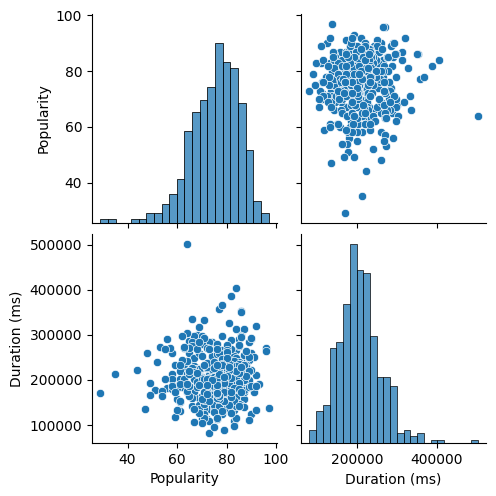

In [88]:
numeric_cols = ['Popularity','Duration (ms)']
sns.pairplot(df[numeric_cols])
plt.show()

9.Does the duration of tracks vary significantly across different artists?
 Explore this visually using a box plot or violin plot.

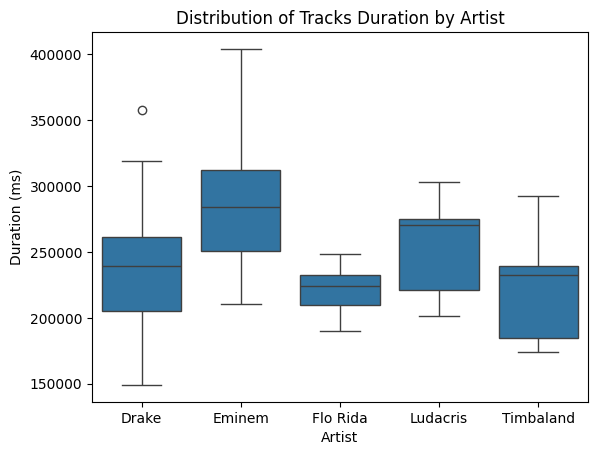

In [92]:
filtered_df = df[df['Artist'].isin(top_artists)]
sns.boxplot(data=filtered_df,x='Artist',y='Duration (ms)')
plt.title('Distribution of Tracks Duration by Artist')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.show()

1. Track Duration Ranges Differ by Artist\

        Eminem has the widest range of track durations, including tracks close to 400,000 ms (6+ minutes) and some around 200,000 ms (3.3 minutes).

        Flo Rida has the narrowest range, indicating that his track durations are more consistent.

2. Median Track Duration\
    The median (line inside each box) shows typical song length:

        Eminem's songs are longest on average (highest median).

        Flo Rida and Timbaland have shorter songs on average.

3. Outliers
        
        Drake has an outlier track with a much higher duration (~360,000 ms), which is likely an unusually long song or a live/interlude track.

4. Distribution Spread (Interquartile Range)
        
        Eminem and Ludacris have a wider interquartile range (IQR) → Their songs vary more in length.

        Flo Rida have a tighter IQR → Their songs are more uniform in length.




 10.How does the distribution of track popularity vary for different artists?
 Visualize this using a swarm plot or a violin plot.

C:\Users\udit2\AppData\Local\Temp\ipykernel_18952\2769053252.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered_df,x='Artist',y='Popularity',inner='box',palette='Set2')


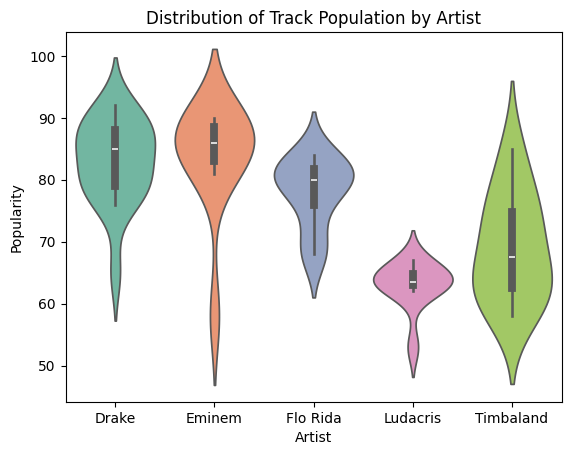

In [93]:
sns.violinplot(data=filtered_df,x='Artist',y='Popularity',inner='box',palette='Set2')
plt.title('Distribution of Track Population by Artist')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.show()

1. Eminem and Drake have the most consistently high popularity
        
        Their violins are narrower and centered at the top (80–90+), indicating:

        Most of their tracks are consistently popular.

        Very few (if any) low-popularity tracks.

2. Ludacris has the lowest track popularity overall
        
        His violin is shorter and located lower, around 60–65, meaning:

        His songs in this dataset are less popular.

        There's less variation—his tracks are consistently lower in popularity.

3. Timbaland has the widest popularity range
        
        His violin is tall and wide, stretching from around 55 to 85, indicating:

        He has both less popular and highly popular tracks.

        There's high variability in how popular his songs are.

4. Flo Rida's tracks have moderately high popularity with a small spread

        His violin is relatively narrow and centered around 80:

        His songs are fairly consistently popular, but not as high as Drake/Eminem.

        Less variation, no extremely low or high tracks.
